# **VGG 19 on CT Scan Data for classifying tumours as Benign or Malignant**

**Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Imports**

In [ ]:
import tensorflow as tf
from matplotlib import pyplot
import matplotlib.pyplot as plt
import glob
import os
import cv2
import math
from keras import applications
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Convolution2D,Activation,Flatten,Dense,Dropout,MaxPool2D,BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras import backend as K

import keras
from keras.models import Sequential, Model,load_model
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform

import h5py
import numpy as np
# import cv2
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation, Dropout
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
from sklearn.metrics import classification_report,confusion_matrix

import pandas as pd
import numpy as np
# import os, cv2

from scipy import misc

import matplotlib.pyplot as plt
import seaborn as sns
# import pickle

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_path="/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Train/"
val_path="/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Val/"
test_path="/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Test/"
class_names=os.listdir(train_path)
class_names_val=os.listdir(val_path)
class_names_test=os.listdir(test_path)

print(class_names)
print(class_names_test)

['Benign', 'Malignant']
['Benign', 'Malignant']


In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

In [ ]:
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Train/",target_size=(224, 224),batch_size=32,shuffle=True,class_mode='binary')
val_generator = val_datagen.flow_from_directory("/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Val/",target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary')
test_generator = test_datagen.flow_from_directory("/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Test/",target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary')

Found 3644 images belonging to 2 classes.
Found 1561 images belonging to 2 classes.
Found 520 images belonging to 2 classes.


In [ ]:
test_generator.class_indices

{'Benign': 0, 'Malignant': 1}

In [ ]:
import os

train_benign_list = os.listdir("/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Train/Benign") # dir is your directory path
train_benign_number_files = len(train_benign_list)
train_benign_number_files


2633

In [ ]:
train_malignant_list = os.listdir("/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Train/Malignant") # dir is your directory path
train_malignant_number_files = len(train_malignant_list)
train_malignant_number_files

1011

In [ ]:
val_benign_list = os.listdir("/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Val/Benign") # dir is your directory path
val_benign_number_files = len(val_benign_list)
val_benign_number_files

1128

In [ ]:
val_malignant_list = os.listdir("/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Val/Malignant") # dir is your directory path
val_malignant_number_files = len(val_malignant_list)
val_malignant_number_files

433

In [ ]:
test_benign_list = os.listdir("/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Test/Benign") # dir is your directory path
test_benign_number_files = len(test_benign_list)
test_benign_number_files

376

In [ ]:
test_malignant_list = os.listdir("/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Test/Malignant") # dir is your directory path
test_malignant_number_files = len(test_malignant_list)
test_malignant_number_files

144

In [ ]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(16,10), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=12)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [ ]:
imgs, labels = next(train_generator)

In [ ]:
labels

array([0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
      dtype=float32)

**Defining the architecture for VGG16**

In [ ]:
vgg19_model = keras.applications.vgg19.VGG19()

574726144/574710816 [==============================] - 3s 0us/step


In [ ]:
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
type(vgg19_model)

keras.engine.functional.Functional

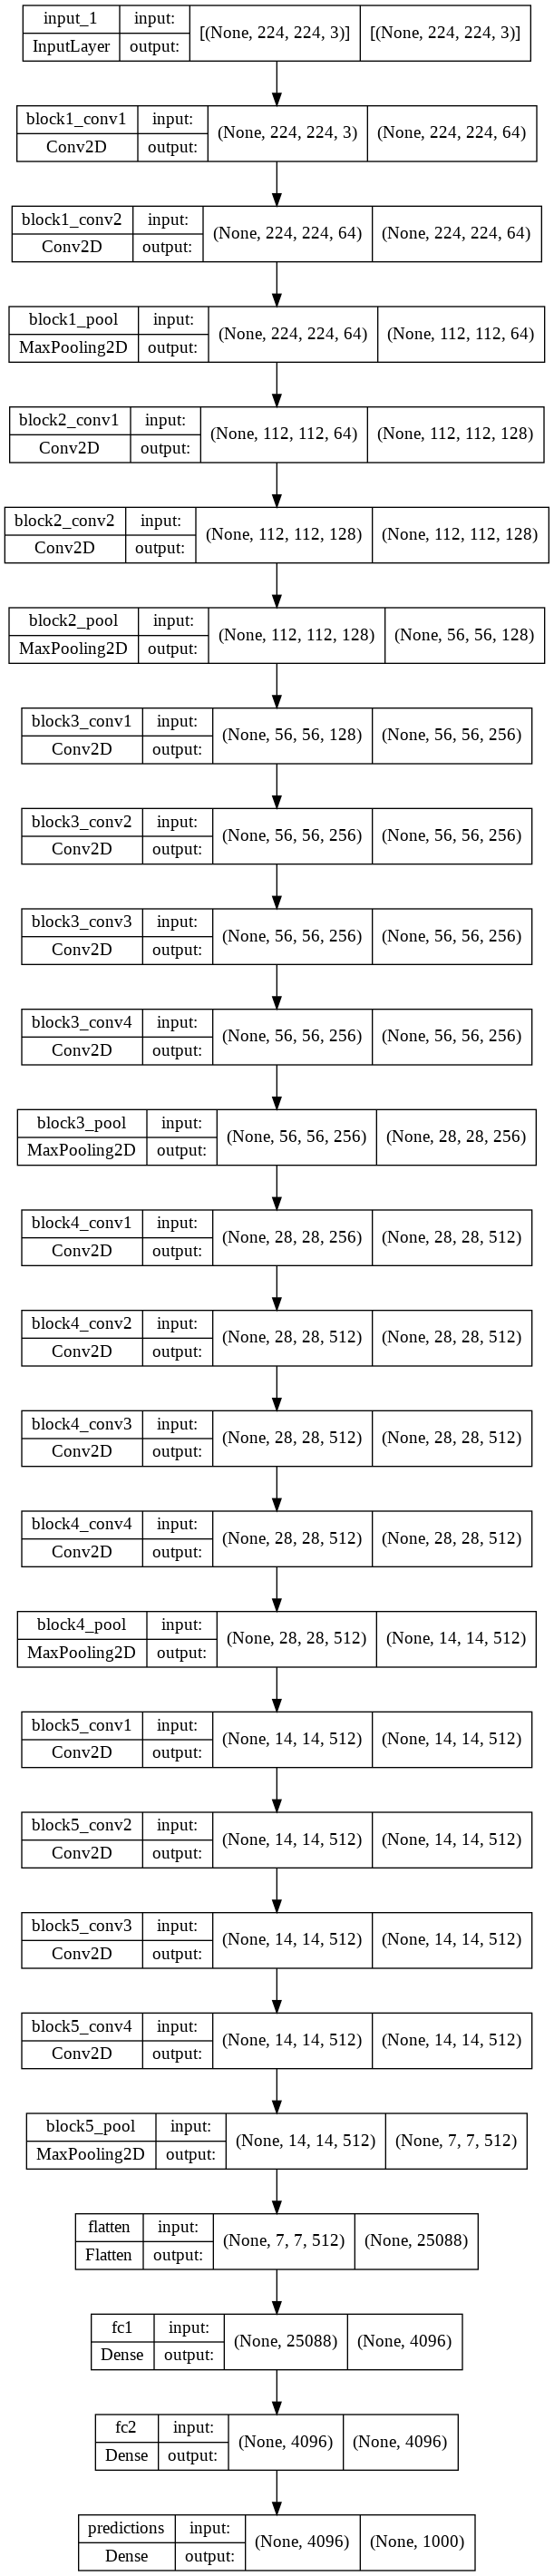

In [ ]:
dot_img_file = '/content/drive/MyDrive/Assignments/Assignment 3/VGG19.png'
tf.keras.utils.plot_model(vgg19_model, to_file=dot_img_file, show_shapes=True)

In [ ]:
classifier = Sequential()
for layer in vgg19_model.layers:
    classifier.add(layer)

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
type(classifier)

keras.engine.sequential.Sequential

In [ ]:
classifier.layers.pop()

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
# #freeze the top layers
# for layer in classifier.layers:
#     layer.trainable = False

In [ ]:
classifier.add(Dense(units = 2, activation = 'relu'))  # 2 classes

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

**Preprocessing the train and test images before training and validating the VGG16 model**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

#Applying Augmentaion on data to avoid overfitting
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set =train_datagen.flow_from_directory('/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Train/',target_size = (224, 224),batch_size = 8,class_mode = 'binary')
val_set = val_datagen.flow_from_directory('/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Val/',target_size = (224, 224),batch_size = 8,class_mode = 'binary')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Test/',target_size = (224, 224),batch_size = 8,class_mode = 'binary')
type(training_set)

Found 3644 images belonging to 2 classes.
Found 1561 images belonging to 2 classes.
Found 520 images belonging to 2 classes.


keras.preprocessing.image.DirectoryIterator

### **Train with VGG19**

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = classifier.fit(training_set, steps_per_epoch = 20, validation_data = test_set, validation_steps = 20, epochs = 200, verbose = 2)

Epoch 1/200
20/20 - 95s - loss: 0.7441 - accuracy: 0.7812 - val_loss: 0.8233 - val_accuracy: 0.6875 - 95s/epoch - 5s/step
Epoch 2/200
20/20 - 66s - loss: 0.5759 - accuracy: 0.7875 - val_loss: 0.6747 - val_accuracy: 0.7375 - 66s/epoch - 3s/step
Epoch 3/200
20/20 - 52s - loss: 0.6968 - accuracy: 0.7188 - val_loss: 0.5963 - val_accuracy: 0.7625 - 52s/epoch - 3s/step
Epoch 4/200
20/20 - 46s - loss: 0.7738 - accuracy: 0.6625 - val_loss: 0.6210 - val_accuracy: 0.7375 - 46s/epoch - 2s/step
Epoch 5/200
20/20 - 39s - loss: 0.6664 - accuracy: 0.7063 - val_loss: 0.6605 - val_accuracy: 0.7063 - 39s/epoch - 2s/step
Epoch 6/200
20/20 - 31s - loss: 0.6730 - accuracy: 0.6938 - val_loss: 0.6960 - val_accuracy: 0.6750 - 31s/epoch - 2s/step
Epoch 7/200
20/20 - 31s - loss: 0.6069 - accuracy: 0.7312 - val_loss: 0.6754 - val_accuracy: 0.6812 - 31s/epoch - 2s/step
Epoch 8/200
20/20 - 30s - loss: 0.6013 - accuracy: 0.7312 - val_loss: 0.6169 - val_accuracy: 0.7188 - 30s/epoch - 2s/step
Epoch 9/200
20/20 - 30s 

**Variation of Train and Validation loss and accuracy with number of epochs**

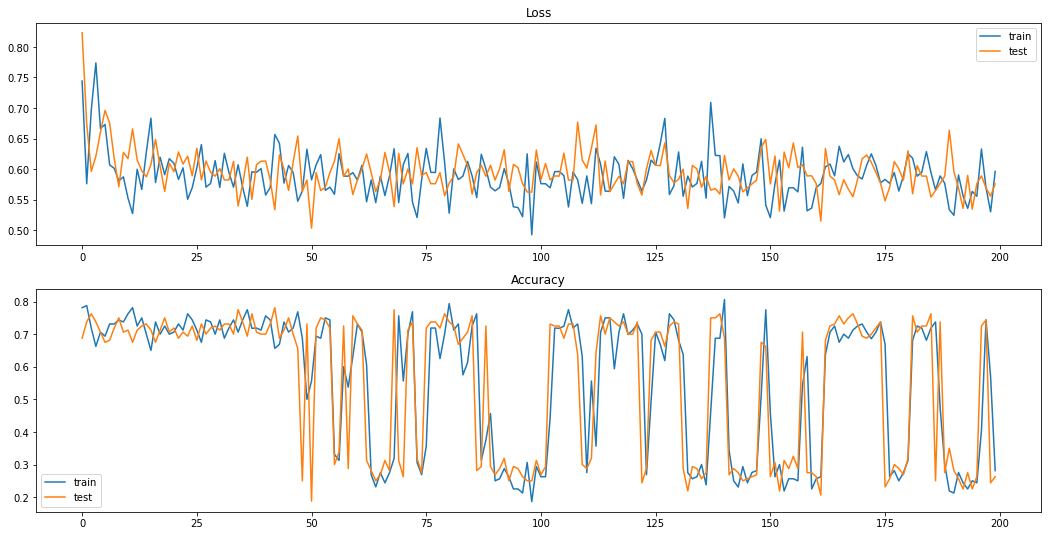

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,9)

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.savefig('/content/drive/MyDrive/Assignments/Assignment 1/TrainTest_LossAccuracy_Graph_VGG16.png')
pyplot.show()

**Generating predictions on test set: Benign and Malignant**

In [ ]:
# import numpy as np
# from keras.preprocessing import image
# test_image =image.load_img('/content/drive/MyDrive/Assignments/Assignment 3/Custom_Dataset/Test/Benign/13.jpg',target_size = (224, 224))
# test_image = image.img_to_array(test_image)
# test_image = np.expand_dims(test_image, axis = 0)
# result = classifier.predict(test_image)
# #print(result[0][0])
# training_set.class_indices
# if result[0][0] == 1:
#   prediction = 'Malignant'
# else:
#   prediction = 'Benign'
# print(prediction)

In [ ]:
test_steps_per_epoch = np.math.ceil(test_set.samples / test_set.batch_size)

predictions = classifier.predict_generator(test_set, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())

In [ ]:
predicted_classes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
true_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**Generating model evaluation metrics on test set like confusion matrix, precision, recall,F1 score**

In [ ]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

      Benign       0.00      0.00      0.00       376
   Malignant       0.28      1.00      0.43       144

    accuracy                           0.28       520
   macro avg       0.14      0.50      0.22       520
weighted avg       0.08      0.28      0.12       520



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix = metrics.confusion_matrix(y_true=true_classes, y_pred=predicted_classes)

In [ ]:
len(true_classes)

520

In [ ]:
len(predicted_classes)

520

In [ ]:
confusion_matrix

array([[  0, 376],
       [  0, 144]])

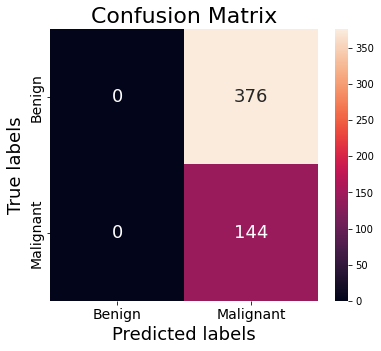

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (6,5)
ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, fmt='g', ax=ax, annot_kws={"fontsize":18});  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=18);
ax.set_ylabel('True labels', fontsize=18);
ax.set_title('Confusion Matrix',fontsize=22);
ax.xaxis.set_ticklabels(['Benign', 'Malignant'],fontsize=14);
ax.yaxis.set_ticklabels(['Benign', 'Malignant'],fontsize=14);

plt.savefig('/content/drive/MyDrive/Assignments/Assignment 3/Confusion_Matrix_VGG16.png')

Val accuracy: 88.7%, Test accuracy: 86.4%